# Project: Breast Cancer Wisconsin (Original)

## Name:
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#model">Model Building</a></li>
<li><a href="#cnn">CNN</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)

<a id='intro'></a>



## Section I: Introduction

**Dataset**: [Breast Cancer Wisconsin (Original)](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

**Description**: Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed from the data itself:

Group 1: 367 instances (January 1989)
Group 2:  70 instances (October 1989)
Group 3:  31 instances (February 1990)
Group 4:  17 instances (April 1990)
Group 5:  48 instances (August 1990)
Group 6:  49 instances (Updated January 1991)
Group 7:  31 instances (June 1991)
Group 8:  86 instances (November 1991)
-----------------------------------------
Total:   699 points (as of the donated datbase on 15 July 1992)

Note that the results summarized above in Past Usage refer to a dataset of size 369, while Group 1 has only 367 instances.  This is because it originally contained 369 instances; 2 were removed.  The following statements summarizes changes to the original Group 1's set of data:

 Group 1 : 367 points: 200B 167M (January 1989)

 Revised Jan 10, 1991:

 Replaced zero bare nuclei in 1080185 & 1187805

 Revised Nov 22,1991:

 Removed 765878,4,5,9,7,10,10,10,3,8,1 no record

 Removed 484201,2,7,8,8,4,3,10,3,4,1 zero epithelial

 Changed 0 to 1 in field 6 of sample 1219406

 Changed 0 to 1 in field 8 of following sample:
1182404,2,3,1,1,1,2,0,1,1,1

**Columns Description**
- **`Clump_thickness`**:  (1-10) This measures the thickness of the clump of breast cancer cells. Benign cells tend to be grouped in monolayers, while cancerous cells are often found in multilayers.
- **`Uniformity_of_cell_size`**:  (1-10) This evaluates the uniformity in the size of the cancer cells. Cancer cells tend to vary in size.
- **`Uniformity_of_cell_shape`**: (1-10) This assesses the uniformity in the shape of the cancer cells. Like cell size, cancer cells also tend to vary in shape.
- **`Marginal_adhesion`**:  (1-10) This measures the extent to which cells stick together at the edges. Normal cells tend to adhere together, while cancer cells often lose this ability, indicating malignancy.
- **`Single_epithelial_cell_size`**:  (1-10) This indicates the size of individual epithelial cells. Enlarged epithelial cells may be a sign of malignancy.
- **`Bare_nuclei`**: (1-10) Refers to nuclei that are not surrounded by cytoplasm. These are typically seen in benign tumors. This column contains missing values.
- **`Bland_chromatin`**: (1-10) Describes the appearance of the nucleus in cells. Benign cells usually have a uniform texture, while cancer cells tend to have more coarse and clumped chromatin.
- **`Normal_nucleoli`**:  (1-10) Nucleoli are small structures in the nucleus. In normal cells, nucleoli are usually small or not visible, but in cancer cells, they become more prominent and sometimes multiple.
- **`Mitoses`**: (1-10) This measures the rate of cell division. Uncontrolled mitosis is a characteristic of cancer.
- **`Class`**: (2 for benign, 4 for malignant)
  Class Labels 2 = benign, 4 = malignant
  
2: Benign - This label indicates that the breast cancer case is benign, meaning it's generally less aggressive and less likely to invade surrounding tissues or spread to other parts of the body.

4: Malignant - This label signifies that the breast cancer case is malignant, implying it's more aggressive and has a higher likelihood of spreading to other parts of the body or recurring after treatment.


The classification of breast cancer into benign and malignant is crucial for determining the appropriate course of treatment and understanding the prognosis. Benign tumors are typically less harmful and often don't require the same level of aggressive treatment as malignant tumors. On the other hand, malignant tumors are considered more serious and may require more extensive treatment, including surgery, radiation, chemotherapy, or a combination of these treatments.

## Research Areas and Target Variable (Class) Analysis:

What is the overall distribution of benign vs. malignant cases in the dataset?

How do individual features (like clump thickness, uniformity of cell size) vary between benign and malignant cases?
 ## Univariate Analysis:

What patterns can be observed in each feature, such as clump thickness, uniformity of cell size, etc.?

How does each feature individually relate to the likelihood of a tumor being benign or malignant?

## Multivariate Analysis:

How do the features correlate with each other?

Are there any combinations of features that are particularly indicative of a tumor being benign or malignant?

## Limitations in the Dataset:

Are there any inconsistencies or missing values in the dataset, particularly in crucial features like bare nuclei?

How might the presence of missing values or inconsistencies impact the analysis and interpretation of the data?

## Visual Analysis:

Since most features are numerical, what insights can be gained from histograms, scatter plots, or box plots?

Can heatmaps or pair plots be used to visualize the correlation between features?

## Geographical or Demographic Analysis:

While the dataset might not include geographical or demographic data, how could such information theoretically influence the analysis?

If available, how might factors like patient age or geographic location correlate with breast cancer characteristics?

## Advanced Analysis:

Can cluster analysis reveal any interesting groupings or patterns in the data?

How might machine learning models help in predicting the class based on the given features?

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=12)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
{'uci_id': 12, 'name': 'Balance Scale', 'repository_url': 'https://archive.ics.uci.edu/dataset/12/balance+scale', 'data_url': 'https://archive.ics.uci.edu/static/public/12/data.csv', 'abstract': 'Balance scale weight & distance database', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 625, 'num_features': 4, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1976, 'last_updated': 'Fri Feb 09 2024', 'dataset_doi': '10.24432/C5488X', 'creators': ['R. Siegler'], 'intro_paper': None, 'additional_info': {'summary': 'This data set was generated to model psychological experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [ ]:
#Importing all the required libraries and includin a 'magic word' so that visualizations are plotted
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
y.value_counts()

,count
Class,
2,458
4,241


In [ ]:
X['class']= y
df = X


In [ ]:
#checking for the basic properties of the Dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [ ]:
df.head()
#checking the first 5 rows

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [ ]:
df.tail()
#display the last 5 rows

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4
698,4,8,8,5,4,5.0,10,4,1,4


In [ ]:
df.dtypes
# Checking the data types

,0
Clump_thickness,int64
Uniformity_of_cell_size,int64
Uniformity_of_cell_shape,int64
Marginal_adhesion,int64
Single_epithelial_cell_size,int64
Bare_nuclei,float64
Bland_chromatin,int64
Normal_nucleoli,int64
Mitoses,int64
class,int64


In [ ]:
df.describe(include='all')
# describing the data using the describw function.

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [ ]:
df.to_csv('breast cancer.csv')

Descriptive Statistics:

The dataset contains 699 entries.
Each feature (like Clump_thickness, Uniformity_of_cell_size, etc.) ranges from 1 to 10, which likely represents a severity or intensity scale.
The mean values of each feature suggest the average characteristics of the breast cancer cells in the dataset.
Standard deviations provide insights into the variability of each feature across samples.
Missing Values:

Most features do not have missing values, except for 'Bare_nuclei', which has 16 missing entries. This needs to be addressed during data preprocessing.

Class Distribution:

The target variable 'class' has two unique values: 2 (benign) and 4 (malignant).
There are 458 benign cases and 241 malignant cases in the dataset.
This distribution indicates that the dataset is somewhat imbalanced, with more benign cases than malignant.
From this analysis, we can define the nature of the problem:

The problem is a classification problem, as the goal is to predict whether a given set of breast cancer cell characteristics corresponds to a benign or malignant tumor.
There are two classes in the dataset: benign (class label 2) and malignant (class label 4).

In [ ]:
df.corr()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,class
Clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.593091,0.558428,0.535835,0.350034,0.716001
Uniformity_of_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.691709,0.755721,0.722865,0.458693,0.817904
Uniformity_of_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.713878,0.735948,0.719446,0.438911,0.818934
Marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.670648,0.666715,0.603352,0.417633,0.696800
Single_epithelial_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.585716,0.616102,0.628881,0.479101,0.682785
Bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.680615,1.000000,0.665878,0.344169,0.756616
Normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.584280,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.339210,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.822696,0.756616,0.712244,0.423170,1.000000


In [ ]:
# Descriptive statistics of the dataset
descriptive_stats = df.describe()

# Checking for missing values
missing_values = df.isnull().sum()

descriptive_stats, missing_values


(       Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
 count       699.000000               699.000000                699.000000   
 mean          4.417740                 3.134478                  3.207439   
 std           2.815741                 3.051459                  2.971913   
 min           1.000000                 1.000000                  1.000000   
 25%           2.000000                 1.000000                  1.000000   
 50%           4.000000                 1.000000                  1.000000   
 75%           6.000000                 5.000000                  5.000000   
 max          10.000000                10.000000                 10.000000   
 
        Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
 count         699.000000                   699.000000   683.000000   
 mean            2.806867                     3.216023     3.544656   
 std             2.855379                     2.214300     3.643857   
 min        

In [ ]:
# Handling missing values by imputing with the median
median_value = df['Bare_nuclei'].median()
df['Bare_nuclei'].fillna(median_value, inplace=True)

# Re-checking for missing values after imputation
missing_values_after_imputation = df.isnull().sum()

# Recalculating the correlation matrix after handling missing values
correlation_matrix = df.corr()


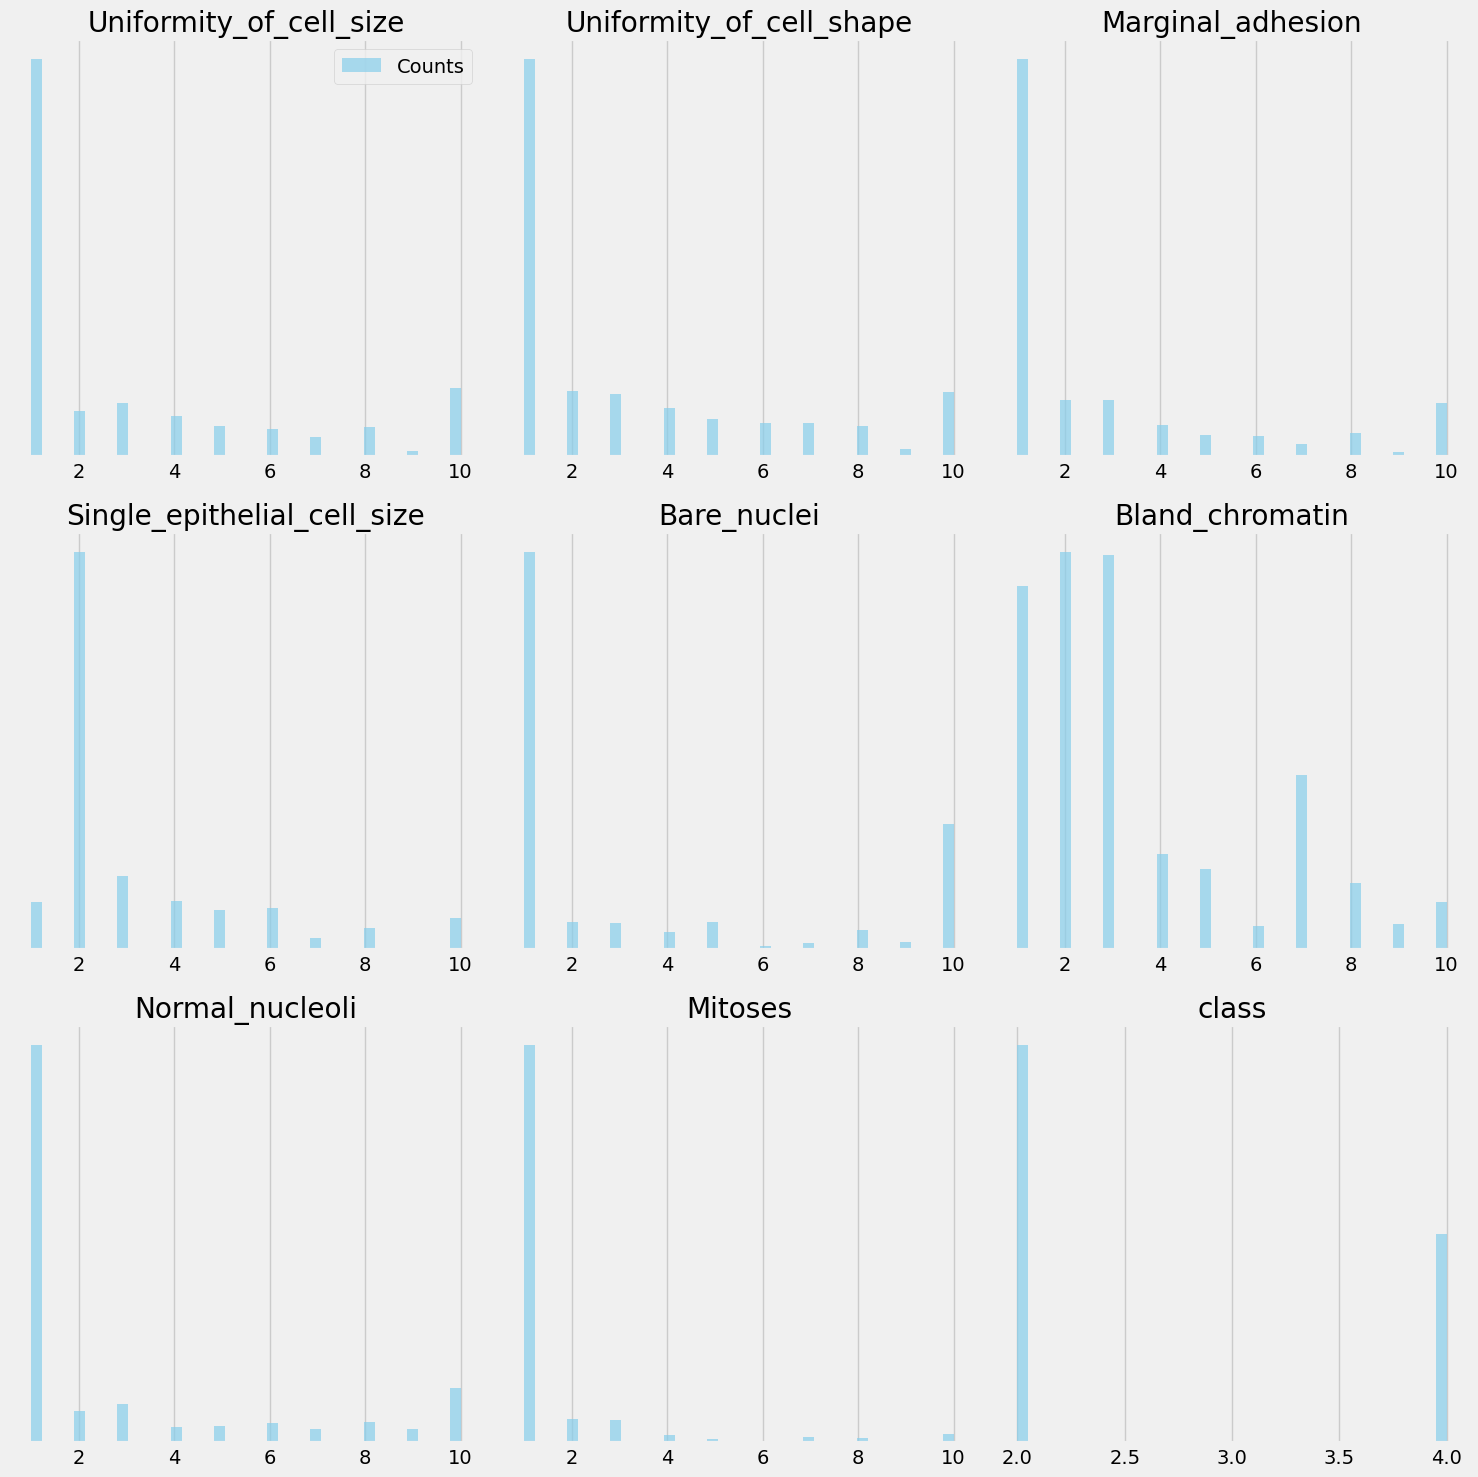

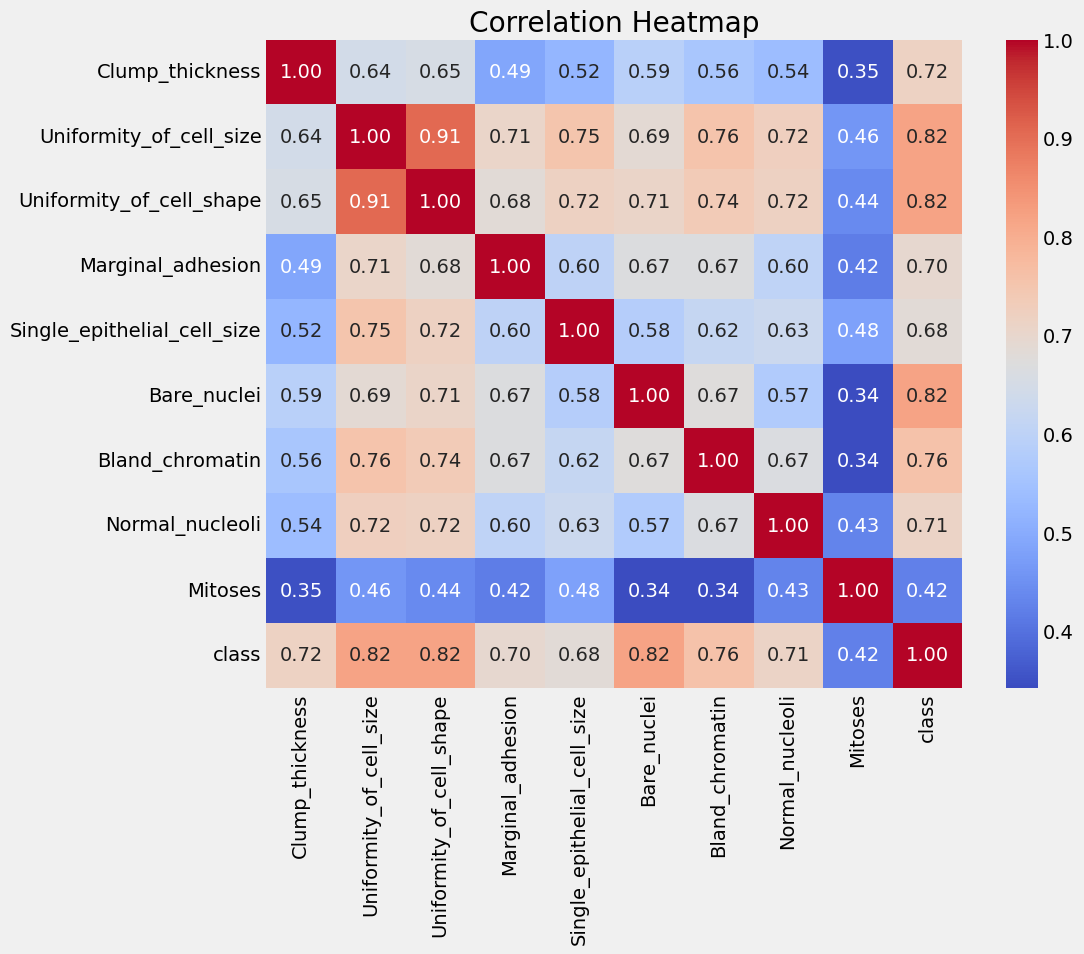

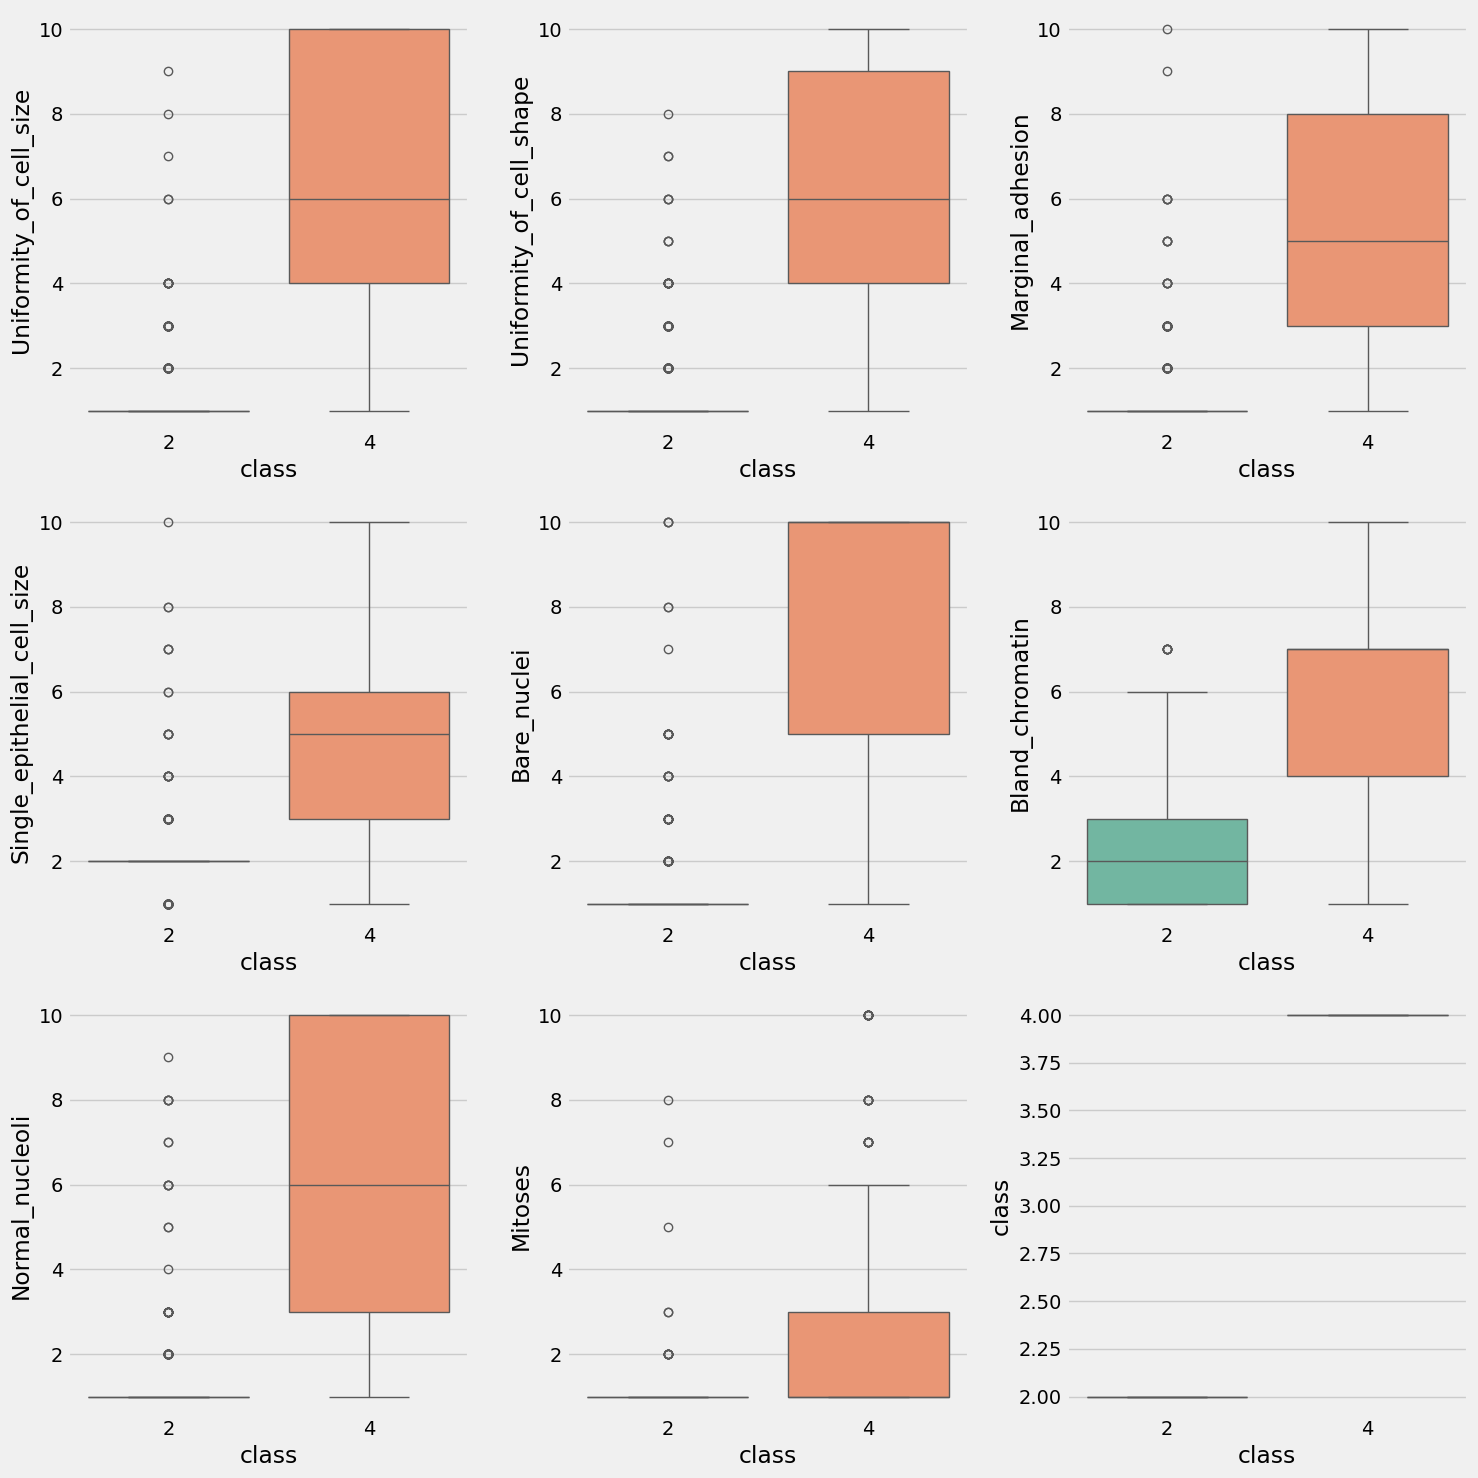

In [ ]:
# Re-creating the histograms for the distribution of various features
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax = ax.ravel()  # Ravel turns a matrix into a vector, which is easier to iterate
for i in range(9):
    _, bins = np.histogram(df.iloc[:, i+1], bins=40)
    ax[i].hist(df.iloc[:, i+1], bins=bins, color='skyblue', alpha=0.7)
    ax[i].set_title(df.columns[i+1])
    ax[i].set_yticks(())
ax[0].legend(['Counts'], loc='best')
fig.tight_layout()
plt.show()

# Re-creating the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Re-creating the box plots for the distribution of features across different classes
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax = ax.ravel()
for i in range(9):
    sns.boxplot(x='class', y=df.columns[i+1], data=df, ax=ax[i], palette="Set2")
fig.tight_layout()
plt.show()

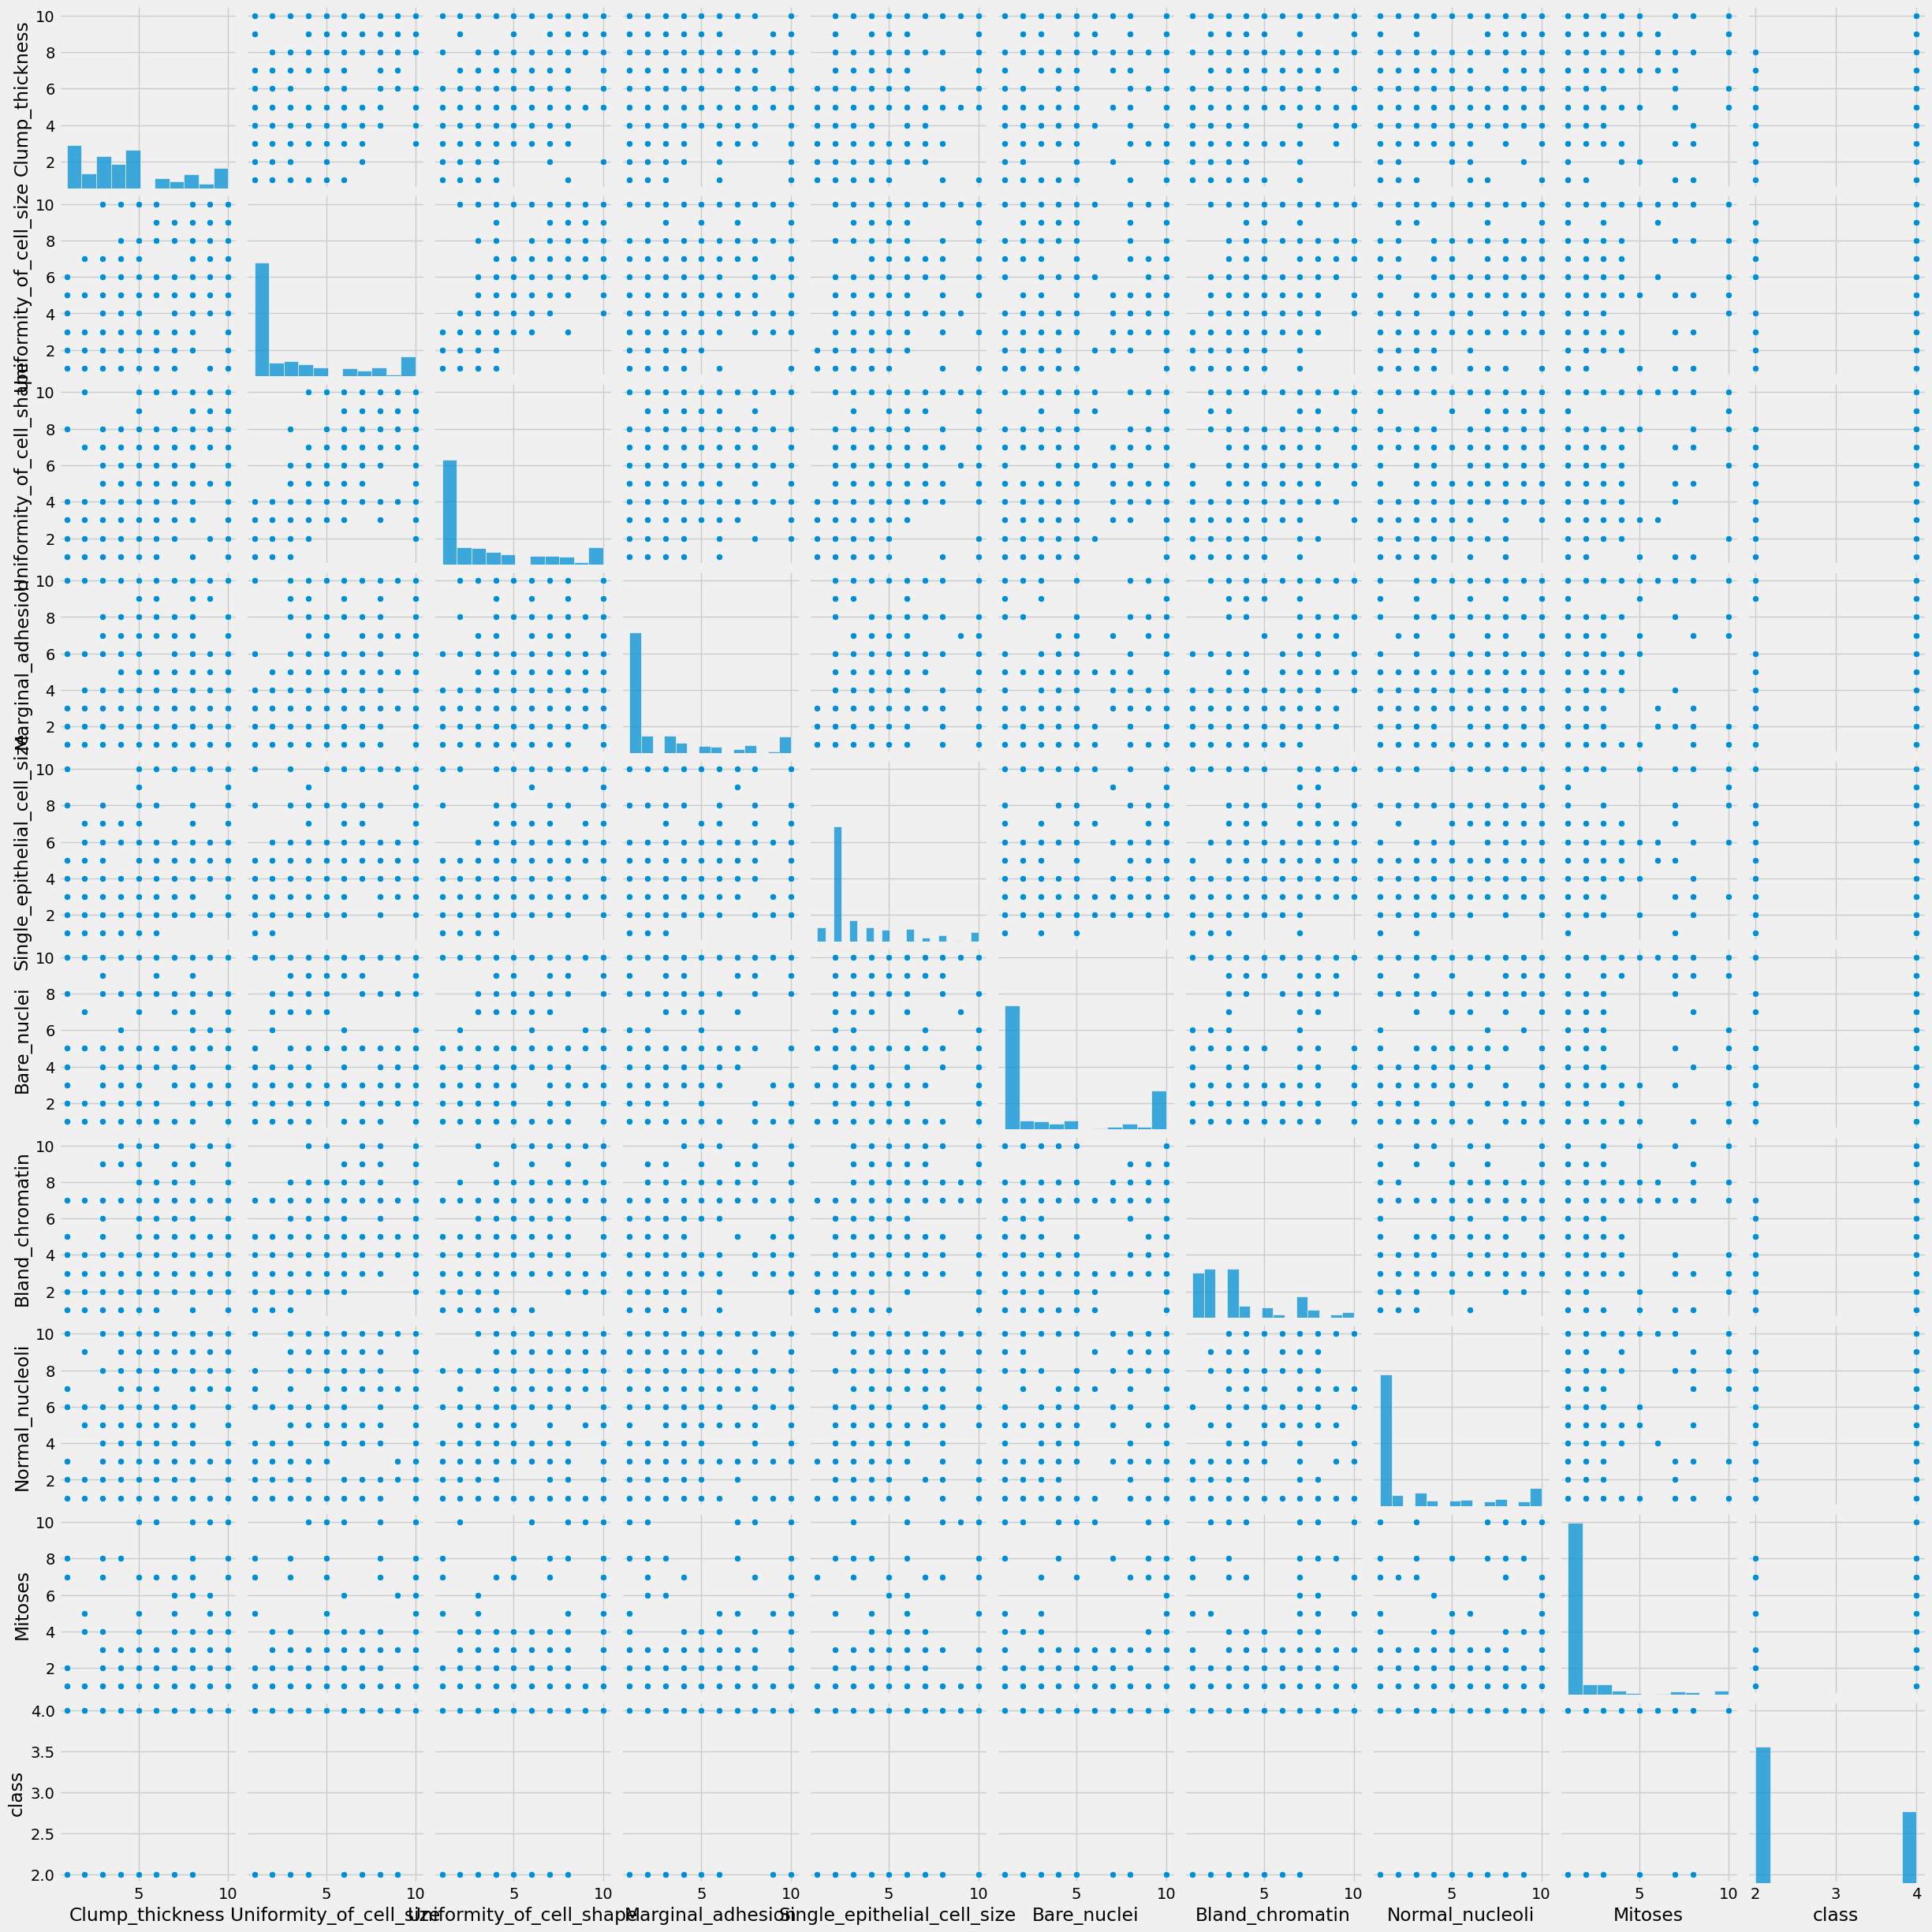

In [ ]:
sns.pairplot(df)

# Univariate Analysis
How each of the columns in themselves and how they relate with the target variable which is the class

In [ ]:
df.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'class'],
      dtype='object')

In [ ]:
def cat_plot(i):
  print(df[i].describe())
  print(df[i].value_counts())
  plt.figure(figsize=(15,10))
  fig, ax =plt.subplots(1,2)
  sns.countplot(data= df,x =i, ax=ax[0])
  sns.countplot(data= df,x =i,hue='class', ax=ax[1])
  fig.show()



1. Clump_thickness

count    699.000000
mean       4.417740
std        2.815741
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       10.000000
Name: Clump_thickness, dtype: float64
Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

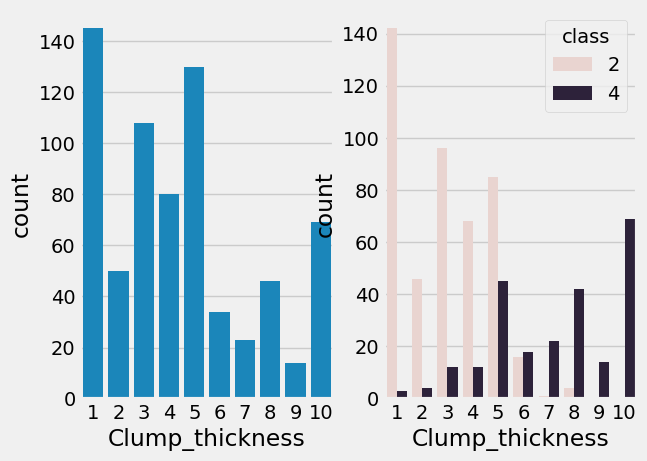

In [ ]:
cat_plot('Clump_thickness')

2. Uniformity_of_cell_size

count    699.000000
mean       3.134478
std        3.051459
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Uniformity_of_cell_size, dtype: float64
Uniformity_of_cell_size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

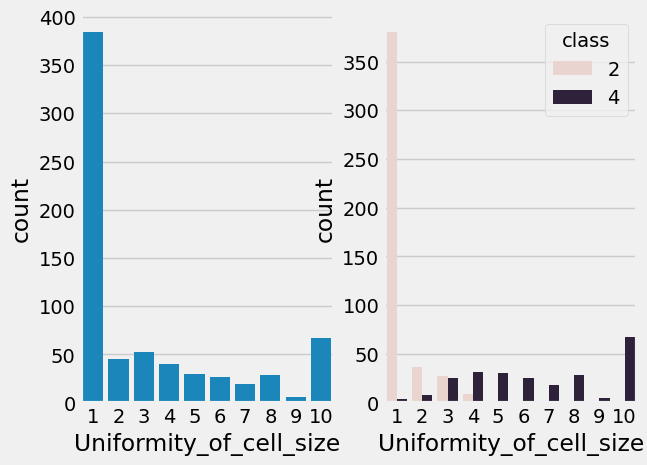

In [ ]:
cat_plot('Uniformity_of_cell_size')

In [ ]:
df['Bare_nuclei'] = df['Bare_nuclei'].astype(int)

3. Uniformity_of_cell_shape

count    699.000000
mean       3.207439
std        2.971913
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Uniformity_of_cell_shape, dtype: float64
Uniformity_of_cell_shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

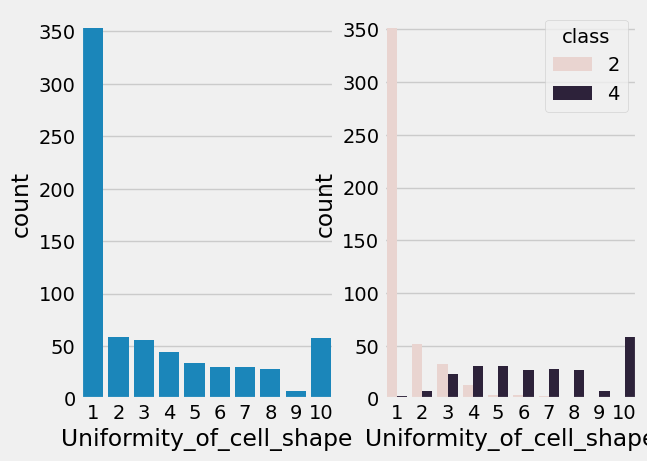

In [ ]:
cat_plot('Uniformity_of_cell_shape')

4.Marginal_adhesion

count    699.000000
mean       2.806867
std        2.855379
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Marginal_adhesion, dtype: float64
Marginal_adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

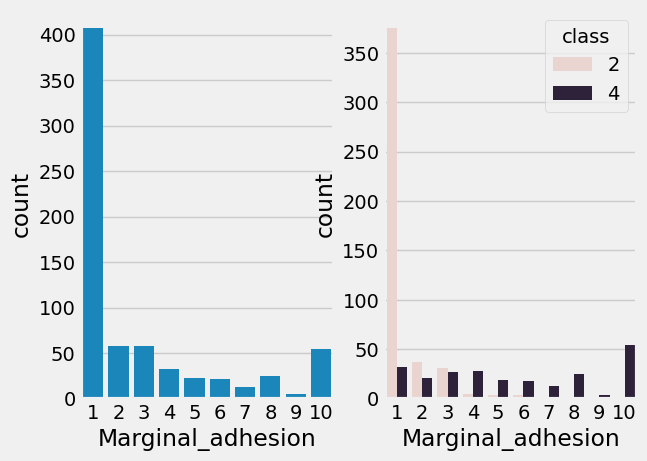

In [ ]:
cat_plot('Marginal_adhesion')

5. Single_epithelial_cell_size

count    699.000000
mean       3.216023
std        2.214300
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: Single_epithelial_cell_size, dtype: float64
Single_epithelial_cell_size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

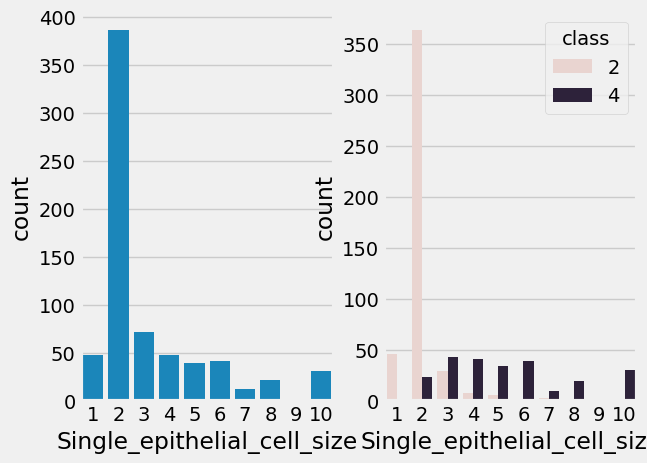

In [ ]:
cat_plot('Single_epithelial_cell_size')

6. Bare_nuclei

count    699.000000
mean       3.486409
std        3.621929
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Bare_nuclei, dtype: float64
Bare_nuclei
1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

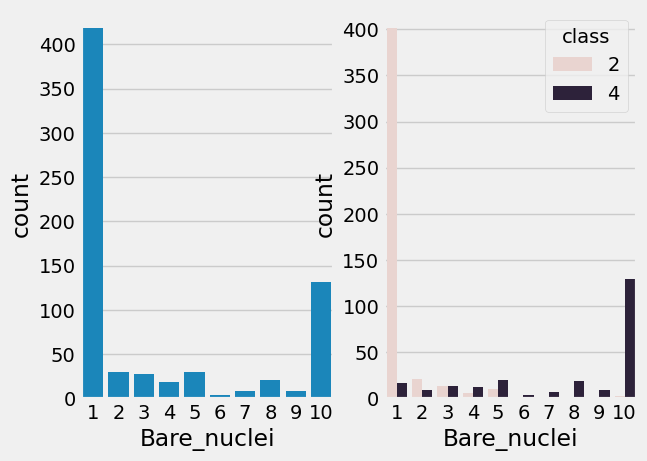

In [ ]:
cat_plot('Bare_nuclei')

7. Bland_chromatin

count    699.000000
mean       3.437768
std        2.438364
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       10.000000
Name: Bland_chromatin, dtype: float64
Bland_chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

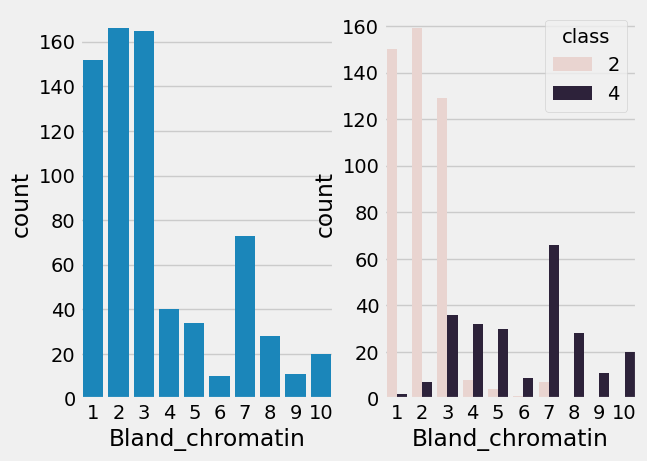

In [ ]:
cat_plot('Bland_chromatin')

8. Normal_nucleoli

count    699.000000
mean       2.866953
std        3.053634
min        1.000000
25%        1.000000
50%        1.000000
75%        4.000000
max       10.000000
Name: Normal_nucleoli, dtype: float64
Normal_nucleoli
1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

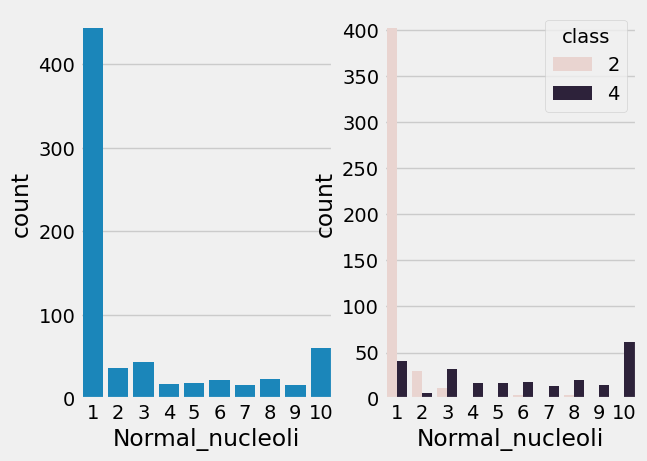

In [ ]:
cat_plot('Normal_nucleoli')

9. Mitoses

count    699.000000
mean       1.589413
std        1.715078
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max       10.000000
Name: Mitoses, dtype: float64
Mitoses
1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64


<Figure size 1500x1000 with 0 Axes>

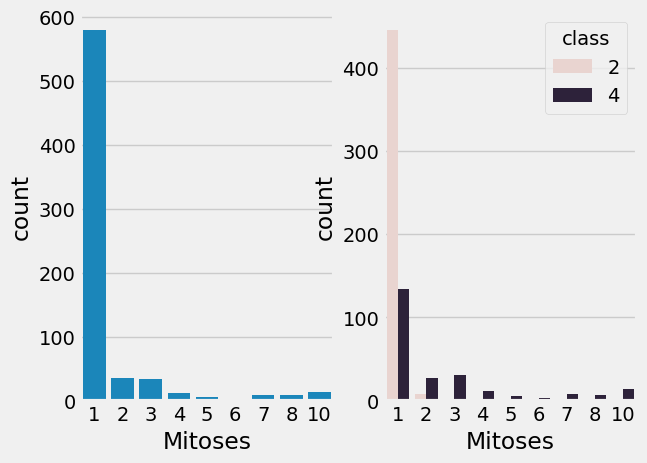

In [ ]:
cat_plot('Mitoses')

<a id='model'></a>



## Section II: Model Building

In [ ]:
# Handling missing values by imputing with the median
median_value = df['Bare_nuclei'].median()
df['Bare_nuclei'].fillna(median_value, inplace=True)

# Re-checking for missing values after imputation
missing_values_after_imputation = df.isnull().sum()

# Recalculating the correlation matrix after handling missing values
correlation_matrix = df.corr()


In [ ]:
df['Bare_nuclei'] = df['Bare_nuclei'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_thickness              699 non-null    int64
 1   Uniformity_of_cell_size      699 non-null    int64
 2   Uniformity_of_cell_shape     699 non-null    int64
 3   Marginal_adhesion            699 non-null    int64
 4   Single_epithelial_cell_size  699 non-null    int64
 5   Bare_nuclei                  699 non-null    int64
 6   Bland_chromatin              699 non-null    int64
 7   Normal_nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
 9   class                        699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB


In [ ]:
correlation = df.corr()['class'].abs().sort_values(ascending = False)
correlation

,class
class,1.000000
Bare_nuclei,0.818968
Uniformity_of_cell_shape,0.818934
Uniformity_of_cell_size,0.817904
Bland_chromatin,0.756616
Clump_thickness,0.716001
Normal_nucleoli,0.712244
Marginal_adhesion,0.696800
Single_epithelial_cell_size,0.682785
Mitoses,0.423170


In [ ]:
complete = df[df["class"] == 4 ]
incomplete = df[df["class"] == 2]

In [ ]:
complete.shape,incomplete.shape

((241, 10), (458, 10))

In [ ]:
from sklearn.utils import resample
complete_upsample = resample(complete,
             replace=True,
             n_samples=len(incomplete),
             random_state=42)

print(complete_upsample.shape)

(458, 10)


class
4    458
2    458
Name: count, dtype: int64


<Axes: ylabel='Type'>

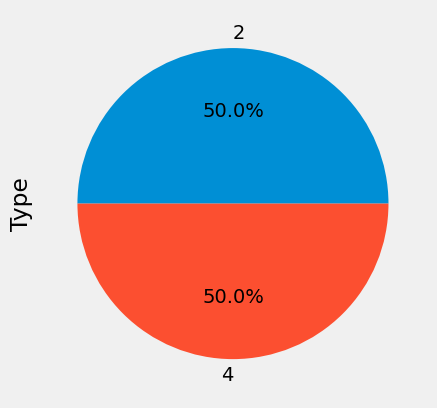

In [ ]:
data_upsampled = pd.concat([complete_upsample, incomplete])

print(data_upsampled["class"].value_counts())

data_upsampled.groupby('class').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
y = data_upsampled['class']
data_upsampled.drop('class', axis = 1, inplace = True)
X=data_upsampled
X.shape, y.shape


((916, 9), (916,))

In [ ]:
# splitting data into training set and test set


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_train.shape

(641, 9)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.9636363636363636
Confusion Matrix : 
[[134   2]
 [  8 131]]
Classification Report : 
              precision    recall  f1-score   support

           2       0.94      0.99      0.96       136
           4       0.98      0.94      0.96       139

    accuracy                           0.96       275
   macro avg       0.96      0.96      0.96       275
weighted avg       0.96      0.96      0.96       275



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.9818181818181818
Confusion Matrix : 
[[133   3]
 [  2 137]]
Classification Report : 
              precision    recall  f1-score   support

           2       0.99      0.98      0.98       136
           4       0.98      0.99      0.98       139

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.9854545454545455
Confusion Matrix : 
[[132   4]
 [  0 139]]
Classification Report : 
              precision    recall  f1-score   support

           2       1.00      0.97      0.99       136
           4       0.97      1.00      0.99       139

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9927272727272727
Confusion Matrix : 
[[134   2]
 [  0 139]]
Classification Report : 
              precision    recall  f1-score   support

           2       1.00      0.99      0.99       136
           4       0.99      1.00      0.99       139

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)

acc_ada = accuracy_score(y_test, y_pred_ada)
conf = confusion_matrix(y_test, y_pred_ada)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_ada}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9745454545454545
Confusion Matrix : 
[[132   4]
 [  3 136]]
Classification Report : 
              precision    recall  f1-score   support

           2       0.98      0.97      0.97       136
           4       0.97      0.98      0.97       139

    accuracy                           0.97       275
   macro avg       0.97      0.97      0.97       275
weighted avg       0.97      0.97      0.97       275



In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, y_pred_gb)
conf = confusion_matrix(y_test, y_pred_gb)
clf_report = classification_report(y_test, y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.9854545454545455
Confusion Matrix : 
[[132   4]
 [  0 139]]
Classification Report : 
              precision    recall  f1-score   support

           2       1.00      0.97      0.99       136
           4       0.97      1.00      0.99       139

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
cat = CatBoostClassifier(iterations=100)
cat.fit(X_train, y_train)

y_pred_cat = cat.predict(X_test)

acc_cat = accuracy_score(y_test, y_pred_cat)
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)
print(f"Accuracy Score of Cat Boost Classifier is : {acc_cat}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Learning rate set to 0.070382
0:	learn: 0.6458765	total: 46.7ms	remaining: 4.63s
1:	learn: 0.6065319	total: 47.5ms	remaining: 2.33s
2:	learn: 0.5674233	total: 48.3ms	remaining: 1.56s
3:	learn: 0.5294047	total: 48.9ms	remaining: 1.17s
4:	learn: 0.4976945	total: 49.5ms	remaining: 941ms
5:	learn: 0.4684847	total: 50.1ms	remaining: 785ms
6:	learn: 0.4428549	total: 50.9ms	remaining: 676ms
7:	learn: 0.4200067	total: 51.4ms	remaining: 591ms
8:	learn: 0.3986676	total: 52.1ms	remaining: 527ms
9:	learn: 0.3780558	total: 52.9ms	remaining: 476ms
10:	learn: 0.3604244	total: 53.2ms	remaining: 431ms
11:	learn: 0.3436523	total: 54.1ms	remaining: 397ms
12:	learn: 0.3282547	total: 54.8ms	remaining: 367ms
13:	learn: 0.3147165	total: 55.2ms	remaining: 339ms
14:	learn: 0.3011297	total: 55.6ms	remaining: 315ms
15:	learn: 0.2888353	total: 56.3ms	remaining: 295ms
16:	learn: 0.2770132	total: 57ms	remaining: 278ms
17:	learn: 0.2668643	total: 57.4ms	remaining: 262ms
18:	learn: 0.2564727	total: 58ms	remaining: 24

In [ ]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

y_pred_etc = etc.predict(X_test)

acc_etc = accuracy_score(y_test, y_pred_etc)
conf = confusion_matrix(y_test, y_pred_etc)
clf_report = classification_report(y_test, y_pred_etc)

print(f"Accuracy Score of Extra Trees Classifier is : {acc_etc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")
conf = confusion_matrix(y_test, y_pred_cat)
clf_report = classification_report(y_test, y_pred_cat)

Accuracy Score of Extra Trees Classifier is : 0.9890909090909091
Confusion Matrix : 
[[133   3]
 [  0 139]]
Classification Report : 
              precision    recall  f1-score   support

           2       1.00      0.98      0.99       136
           4       0.98      1.00      0.99       139

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
lgbm = LGBMClassifier(learning_rate = 0.905)
lgbm.fit(X_train, y_train)

y_pred_lgbm = lgbm.predict(X_test)

acc_lgbm = accuracy_score(y_test, y_pred_lgbm)
conf = confusion_matrix(y_test, y_pred_lgbm)
clf_report = classification_report(y_test, y_pred_lgbm)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_lgbm}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

[LightGBM] [Info] Number of positive: 319, number of negative: 322
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 96
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497660 -> initscore=-0.009360
[LightGBM] [Info] Start training from score -0.009360
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [ ]:
classifiers = [('Gradient Boosting Classifier', gb), ('Cat Boost Classifier', cat),  ('Decision Tree', dtc),
               ('Extra Tree', etc), ('Light Gradient', lgbm), ('Random Forest', rd_clf), ('Ada Boost', ada), ('Logistic', lr),
               ('Knn', knn)]
vc = VotingClassifier(estimators = classifiers)
vc.fit(X_train, y_train)

Learning rate set to 0.070382
0:	learn: 0.6458765	total: 431us	remaining: 42.7ms
1:	learn: 0.6065319	total: 813us	remaining: 39.9ms
2:	learn: 0.5674233	total: 1.45ms	remaining: 47ms
3:	learn: 0.5294047	total: 2.01ms	remaining: 48.2ms
4:	learn: 0.4976945	total: 2.84ms	remaining: 54ms
5:	learn: 0.4684847	total: 3.52ms	remaining: 55.1ms
6:	learn: 0.4428549	total: 4.21ms	remaining: 55.9ms
7:	learn: 0.4200067	total: 4.91ms	remaining: 56.4ms
8:	learn: 0.3986676	total: 5.67ms	remaining: 57.4ms
9:	learn: 0.3780558	total: 6.32ms	remaining: 56.9ms
10:	learn: 0.3604244	total: 7.04ms	remaining: 57ms
11:	learn: 0.3436523	total: 8.02ms	remaining: 58.8ms
12:	learn: 0.3282547	total: 8.75ms	remaining: 58.6ms
13:	learn: 0.3147165	total: 9.38ms	remaining: 57.6ms
14:	learn: 0.3011297	total: 10.3ms	remaining: 58.1ms
15:	learn: 0.2888353	total: 11ms	remaining: 57.9ms
16:	learn: 0.2770132	total: 12ms	remaining: 58.8ms
17:	learn: 0.2668643	total: 12.7ms	remaining: 57.9ms
18:	learn: 0.2564727	total: 13.5ms	rem

VotingClassifier(estimators=[('Gradient Boosting Classifier',
                              GradientBoostingClassifier()),
                             ('Cat Boost Classifier',
                              <catboost.core.CatBoostClassifier object at 0x7d60b750ab30>),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('Extra Tree', ExtraTreesClassifier()),
                             ('Light Gradient',
                              LGBMClassifier(learning_rate=0.905)),
                             ('Random Forest', RandomForestClassifier()),
                             ('Ada Boost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier())),
                             ('Logistic', LogisticRegression()),
                             ('Knn', KNeighborsClassifier())])

In [ ]:
y_pred_vc = vc.predict(X_test)

acc_vtc = accuracy_score(y_test, y_pred_vc)
conf = confusion_matrix(y_test, y_pred_vc)
clf_report = classification_report(y_test, y_pred_vc)

print(f"Accuracy Score of Voting Classifier is : {acc_vtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Voting Classifier is : 0.9927272727272727
Confusion Matrix : 
[[134   2]
 [  0 139]]
Classification Report : 
              precision    recall  f1-score   support

           2       1.00      0.99      0.99       136
           4       0.99      1.00      0.99       139

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [ ]:
from tensorflow.keras.utils import to_categorical

X=data_upsampled
#y = to_categorical(y)
y

,class
231,4
436,4
215,4
42,4
238,4
...,...
690,2
692,2
693,2
694,2


In [ ]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
X_test.shape, y_test.shape


((275, 9), (275,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y_encoded = y.replace({2: 0, 4: 1})

# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42
)

# Building the ANN model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer with 32 neurons
    Dense(32, activation='relu'),  # Second hidden layer with 32 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Training the model
model_history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[callback])

# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print("Accuracy: {:.2f}%".format(accuracy * 100))
model.summary()

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5474 - loss: 0.5671 - val_accuracy: 0.7907 - val_loss: 0.5019
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 0.4968 - val_accuracy: 0.8527 - val_loss: 0.4215
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.4203 - val_accuracy: 0.8837 - val_loss: 0.3729
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8877 - loss: 0.3844 - val_accuracy: 0.8915 - val_loss: 0.3443
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8970 - loss: 0.3315 - val_accuracy: 0.8992 - val_loss: 0.3154
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9071 - loss: 0.3084 - val_accuracy: 0.9070 - val_loss: 0.2950
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9117 - loss: 0.2734 - val_accuracy: 0.8915 - val_loss: 0.2816
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9304 - loss: 0.2513 - val_accuracy: 0.8992 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,229 (16.52 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,820 (11.02 KB)

In [ ]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epoch = range(1, 81)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

ValueError: All arguments should have the same length. The length of column argument `df[wide_variable_0]` is 76, whereas the length of  previously-processed arguments ['x'] is 80

<Figure size 1200x600 with 0 Axes>

In [ ]:
acc_ann = model.evaluate(X_test, y_test_encoded)[1]

print(f'Accuracy of model is {acc_ann}')

In [ ]:
acc_cnn=0.8669
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Cat Boost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'ANN', 'CNN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_cat, acc_etc, acc_lgbm, acc_vtc, acc_ann, acc_cnn]
})


models.sort_values(by = 'Score', ascending = False)

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

<a id='cnn'></a>



## Section III: CNN

In [ ]:
 ! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()
! cp kaggle.json ~root/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/breast-histopathology-images
!unzip /content/sample_data/BreastCancer/breast-histopathology-images.zip

In [ ]:
root_dir = "/content/sample_data/BreastCancer"
base_dir = root_dir + ''

In [ ]:
# Change the working directory

%cd /content/sample_data/BreastCancer

In [ ]:
import os
import shutil

def merge_images(root_dir, target_dir_0, target_dir_1):
    # Create target directories if they do not exist
    if not os.path.exists(target_dir_0):
        os.makedirs(target_dir_0)
    if not os.path.exists(target_dir_1):
        os.makedirs(target_dir_1)

    # Walk through the root directory
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            # Construct the original file path
            original_file_path = os.path.join(subdir, file)
            # Check if the file is in directory "0" or "1" and set the target directory
            if subdir.endswith('/0'):
                target_file_path = os.path.join(target_dir_0, file)
            elif subdir.endswith('/1'):
                target_file_path = os.path.join(target_dir_1, file)
            else:
                continue  # If the file is not in "0" or "1", we do nothing
            # Copy the file to the target directory
            shutil.copy2(original_file_path, target_file_path)

# Set your directory paths here
root_dir = '/content/IDC_regular_ps50_idx5'  # The root directory containing all subdirectories
target_dir_0 = '/content/sample_data/BreastCancer/Class_0'  # The target directory for images from "0"
target_dir_1 = '/content/sample_data/BreastCancer/Class_1'  # The target directory for images from "1"

merge_images(root_dir, target_dir_0, target_dir_1)


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

def split_data(source_dir, train_dir, val_dir, test_dir, train_size=0.1, val_size=0.15, test_size=0.15):
    # Ensure the sum of the sizes is equal to 1
    #assert train_size + val_size + test_size == 1

    # Create target directories if they do not exist
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Get all files from the source directory
    files = os.listdir(source_dir)

    # Split files into training and temporary set (temporary will be split into validation and testing)
    train_files, temp_files = train_test_split(files, train_size=train_size)

    # Calculate the proportion of temp files to allocate to validation to maintain the original ratio
    proportion = val_size / (val_size + test_size)

    # Split temporary files into validation and testing
    val_files, test_files = train_test_split(temp_files, train_size=0.5)

    # Function to copy files to a target directory
    def copy_files(files, source_dir, target_dir):
        for file in files:
            shutil.copy2(os.path.join(source_dir, file), os.path.join(target_dir, file))

    # Copy files to their respective directories
    copy_files(train_files, source_dir, train_dir)
    copy_files(val_files, source_dir, val_dir)
    copy_files(test_files, source_dir, test_dir)

# Set your directory paths here
root_dir = '/content/sample_data/BreastCancer'  # The root directory containing all subdirectories
merged_dir_0 = '/content/sample_data/BreastCancer/Class_0'  # The directory with all images of class "0"
merged_dir_1 = '/content/sample_data/BreastCancer/Class_1'  # The directory with all images of class "1"

# Create merged directories for class "0" and "1"
merge_images(root_dir, merged_dir_0, merged_dir_1)

# Split directories for class "0"
split_data(merged_dir_0, '/content/sample_data/BreastCancer/train/0', '/content/sample_data/BreastCancer/val/0', '/content/sample_data/BreastCancer/test/0')
# Split directories for class "1"
split_data(merged_dir_1, '/content/sample_data/BreastCancer/train/1', '/content/sample_data/BreastCancer/val/1', '/content/sample_data/BreastCancer/test/1')


In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
# prompt: create a cnn with tensorflow prebuilt models to classify breast cancer into class 0 0r 1. The dataset contains pictures in various folders labelled already.  Divide into test train and validation sets using code
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the data
train_dir = '/content/sample_data/BreastCancer/train'
val_dir = '/content/sample_data/BreastCancer/val'
test_dir = '/content/sample_data/BreastCancer/test'

# Create the data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='training')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

# Load the MobileNetV2 model
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the base model's layers
for layer in base_model.layers:
    layer.trainable = False

# Add a new top layer
x = base_model.output
x = AveragePooling2D(pool_size=(7, 7))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(units=128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(units=1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
checkpoint = ModelCheckpoint('breast_cancer_classifier.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[checkpoint, early_stopping])

# Evaluate the model
model.evaluate(test_generator)

# Save the model
model.save('breast_cancer_classifier.h5')


<a id='conclusion'></a>



## Section IV: Conclusion

This research demonstrates the effectiveness of machine learning and neural network models in the early detection and diagnosis of breast cancer. The main challenges faced included handling missing data, balancing the dataset, and optimising model parameters to avoid overfitting. If provided more time, further exploration into more complex models, additional feature engineering, and incorporating larger datasets for a more comprehensive analysis would be pursued. The study employed various computational methods, including Decision Trees, KNN, ANNs, and a CNN with MobileNetV2 architecture, achieving high accuracy, especially with the ANN model at 98.5%. These findings underscore the importance of technological advancements in healthcare, particularly in breast cancer subtype identification and diagnosis accuracy. The application of CNNs in medical imaging analysis reaffirms the potential of deep learning techniques in medical diagnostics. Overall, this research contributes significantly to medical technology, aiming to enhance patient outcomes through early and precise cancer detection. Figures depicting the dataset characteristics and models' performance metrics are integral to understanding the study's thoroughness and efficacy.

